<a href="https://colab.research.google.com/github/olfa8687/CNN-LSTM/blob/main/LSTM2018_(new).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset_csv_path='/content/drive/MyDrive/Dataset2018/'
csv_file_names= ['02-14-2018.csv',
                '02-15-2018.csv',
                 '02-16-2018.csv',
                 '02-20-2018.csv',
                 '02-21-2018.csv']
full_path=[]
for csv_file in csv_file_names:
    full_path.append(os.path.join(dataset_csv_path,csv_file))
df = pd.concat(map(pd.read_csv,full_path),ignore_index=True)
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
print("The columns present in the dataset are: ",df.columns)

The columns present in the dataset are:  Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 80 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Dst Port           int64  
 1   Protocol           int64  
 2   Timestamp          object 
 3   Flow Duration      int64  
 4   Tot Fwd Pkts       int64  
 5   Tot Bwd Pkts       int64  
 6   TotLen Fwd Pkts    int64  
 7   TotLen Bwd Pkts    int64  
 8   Fwd Pkt Len Max    int64  
 9   Fwd Pkt Len Min    int64  
 10  Fwd Pkt Len Mean   float64
 11  Fwd Pkt Len Std    float64
 12  Bwd Pkt Len Max    int64  
 13  Bwd Pkt Len Min    int64  
 14  Bwd Pkt Len Mean   float64
 15  Bwd Pkt Len Std    float64
 16  Flow Byts/s        float64
 17  Flow Pkts/s        float64
 18  Flow IAT Mean      float64
 19  Flow IAT Std       float64
 20  Flow IAT Max       int64  
 21  Flow IAT Min       int64  
 22  Fwd IAT Tot        int64  
 23  Fwd IAT Mean       float64
 24  Fwd IAT Std        float64
 25  Fwd IAT Max       

In [ ]:
df.describe()

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,...,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06
mean,6.134380e+03,8.813011e+00,1.028147e+07,5.676310e+00,6.815488e+00,4.417099e+02,4.723844e+03,1.630066e+02,1.118473e+01,4.176076e+01,...,2.337895e+00,1.993505e+01,8.188203e+04,3.486536e+04,1.348432e+05,6.158000e+04,3.724341e+06,4.977859e+05,4.714533e+06,3.118095e+06
std,1.611496e+04,4.950855e+00,8.914813e+08,3.950497e+01,1.014267e+02,2.321434e+04,1.458393e+05,2.828337e+02,2.194242e+01,5.711160e+01,...,5.625452e+00,1.001594e+01,7.855725e+05,3.086169e+05,1.000943e+06,7.307746e+05,3.830152e+08,2.701221e+08,1.076350e+09,1.624343e+07
min,0.000000e+00,0.000000e+00,-9.190110e+11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,1.080000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,6.000000e+00,3.907000e+03,2.000000e+00,1.000000e+00,4.100000e+01,7.400000e+01,3.900000e+01,0.000000e+00,3.384615e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.450000e+02,1.700000e+01,1.783384e+06,6.000000e+00,4.000000e+00,3.640000e+02,4.880000e+02,1.610000e+02,3.000000e+01,5.366667e+01,...,3.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,9.021000e+03,1.918100e+04,8.737314e+06,2.790523e+07,6.444000e+04,1.460000e+03,1.652931e+04,...,1.468000e+03,5.600000e+01,1.119924e+08,6.017711e+07,1.119924e+08,1.119924e+08,3.394503e+11,2.432682e+11,9.797810e+11,1.260300e+10


In [ ]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.000000,0,0,0.0,0.000000,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,50111,6,15/02/2018 09:04:42,22,3,0,31,0,31,0,...,20,0.0,0.000000,0,0,0.0,0.000000,0,0,Benign
2097146,443,6,15/02/2018 09:03:55,54682783,5,1,123,46,46,0,...,20,158783.0,0.000000,158783,158783,54523813.0,0.000000,54523813,54523813,Benign
2097147,443,6,15/02/2018 09:03:56,53682093,5,1,123,46,46,0,...,20,259719.0,0.000000,259719,259719,53421756.0,0.000000,53421756,53421756,Benign
2097148,443,6,15/02/2018 09:03:55,54683364,5,1,123,46,46,0,...,20,158870.0,0.000000,158870,158870,54523593.0,0.000000,54523593,54523593,Benign


In [ ]:
df['Label'].nunique()

5

In [ ]:
df['Label'].value_counts()

,count
Label,
Benign,1663703
FTP-BruteForce,193360
SSH-Bruteforce,187589
DoS attacks-GoldenEye,41508
DoS attacks-Slowloris,10990


In [ ]:
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)
    num=df._get_numeric_data()
    num[num<0]=0

    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)

    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)

    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)

    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)


Dataset Shape:  (2097150, 80)
Zero Variance Columns:  ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'CWE Flag Count', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']  are dropped!!
Shape after removing the zero variance columns:  (2097150, 70)
11851 rows dropped
Shape after Removing NaN:  (2085299, 70)
Shape after dropping duplicates:  (1857258, 70)
Columns which have identical values:  [('Tot Fwd Pkts', 'Subflow Fwd Pkts'), ('Tot Bwd Pkts', 'Subflow Bwd Pkts'), ('TotLen Fwd Pkts', 'Subflow Fwd Byts'), ('TotLen Bwd Pkts', 'Subflow Bwd Byts'), ('Fwd PSH Flags', 'SYN Flag Cnt')]  dropped!
Shape after removing identical value columns:  (1857258, 65)


In [ ]:
 df['Label'].value_counts()

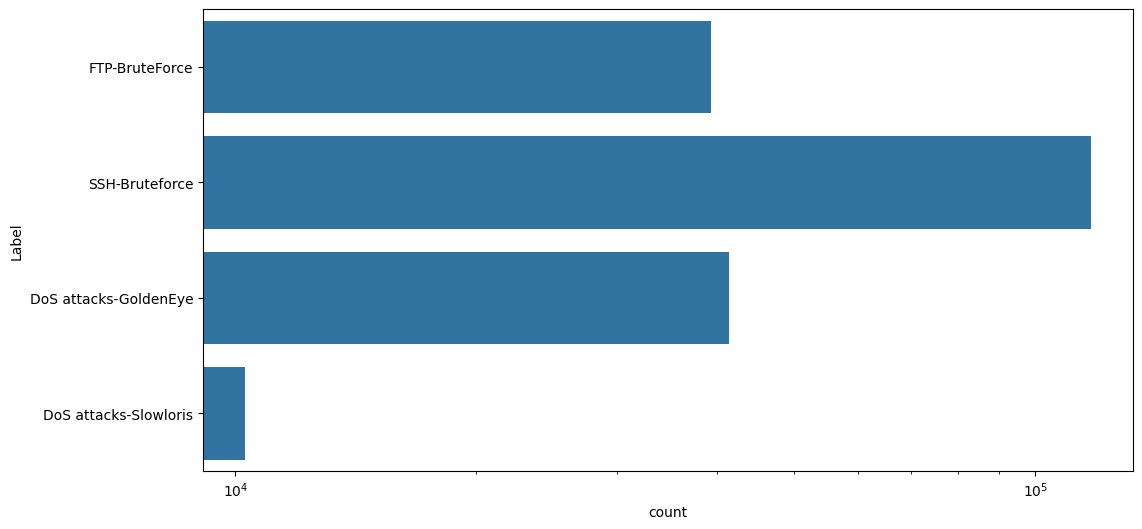

In [ ]:
plt.figure(figsize=(12, 6))
plot = sns.countplot(data=df[df['Label'] != 'Benign'], y='Label')
plt.xscale('log')
fig = plot.get_figure()
fig.savefig('img1.png')

In [ ]:
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
df['label'].value_counts()

,count
label,
Benign,1648850
SSH-Bruteforce,117322
DoS attacks-GoldenEye,41455
FTP-BruteForce,39346
DoS attacks-Slowloris,10285


In [ ]:
new_df=df.copy()

In [ ]:
df.loc[df['label']!='Benign','label']='ATTACK'
df.head()

,dst_port,protocol,timestamp,flow_duration,tot_fwd_pkts,tot_bwd_pkts,totlen_fwd_pkts,totlen_bwd_pkts,fwd_pkt_len_max,fwd_pkt_len_min,...,fwd_seg_size_min,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320859.5,139.300036,56320958,56320761,Benign
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56320733.0,114.551299,56320814,56320652,Benign
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,0,0.0,0.0,0,0,56319311.5,301.934596,56319525,56319098,Benign
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,32,0.0,0.0,0,0,0.0,0.000000,0,0,Benign


In [ ]:
df.label.value_counts()

,count
label,
Benign,1648850
ATTACK,208408


<Axes: xlabel='label', ylabel='count'>

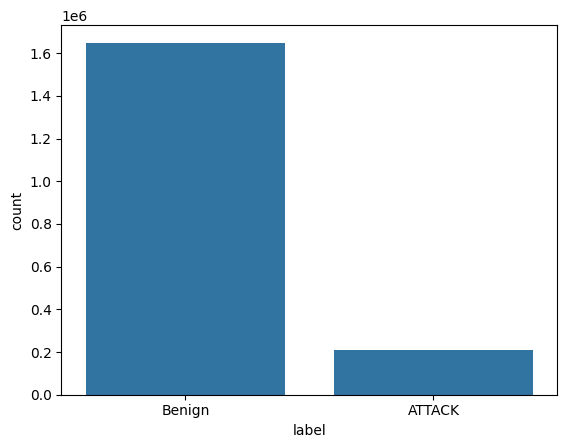

In [ ]:
sns.countplot(data=df,x=df['label'])

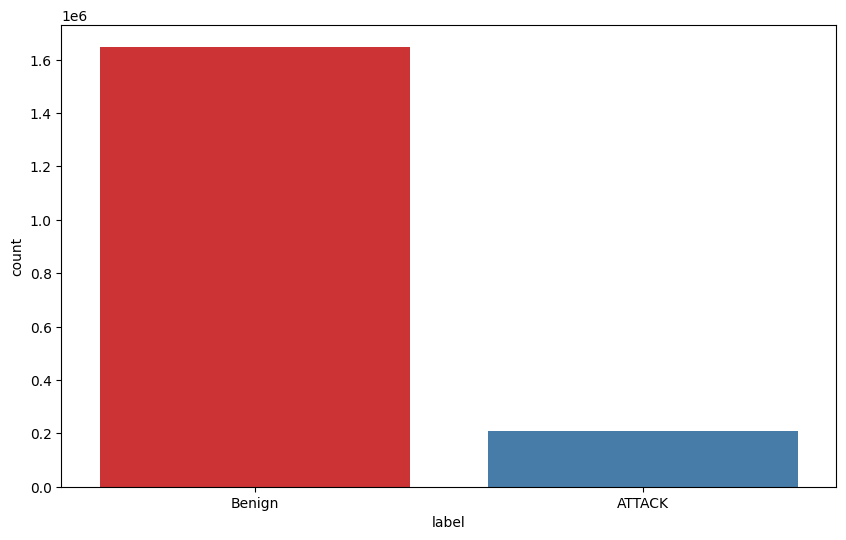

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'label' is the column containing labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', hue='label', palette='Set1')
plt.show()

In [ ]:
size=len(df.loc[df.label=='ATTACK'])
print(size)
bal_df=df.groupby('label').apply(lambda x: x.sample(n=min(size,len(x))))

208408


<ipython-input-21-115e3b427cab>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bal_df=df.groupby('label').apply(lambda x: x.sample(n=min(size,len(x))))


<Axes: xlabel='label', ylabel='count'>

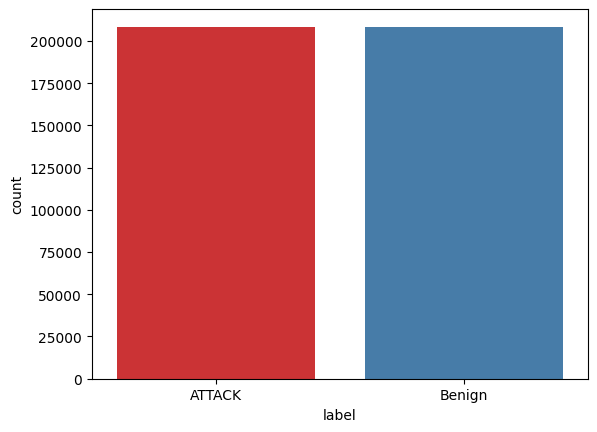

In [ ]:
sns.countplot(data=bal_df,x='label',hue='label', palette='Set1')

In [ ]:
bal_df.shape

(416816, 65)

In [ ]:
bal_df['label'].value_counts()

,count
label,
ATTACK,208408
Benign,208408


In [ ]:
bal_df

In [ ]:
import numpy as np

In [ ]:
from sklearn import metrics
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import Normalizer

#X =bal_df[bal_df.columns[0:-1]]
#X = bal_df.drop(columns=['timestamp'])
#X =bal_df[bal_df.columns[0:-1]]
X = bal_df.drop(columns=['timestamp']).iloc[:, :-1]
X=np.array(X)

y=bal_df[bal_df.columns[-1]]

scaler = Normalizer().fit(X)
X = scaler.transform(X)
# summarize transformed data
X.shape

(416816, 63)

In [ ]:
X

array([[7.44416681e-06, 5.58312511e-07, 4.66146747e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.28337681e-05, 8.95466402e-06, 5.51693865e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09693429e-05, 8.44618442e-06, 5.44114462e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.27529963e-03, 2.25783352e-06, 4.22816580e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.02538488e-07, 3.01903866e-08, 5.79773200e-01, ...,
        7.68515127e-05, 5.03348516e-02, 5.00794610e-02],
       [2.48651782e-06, 3.36774423e-08, 4.10067432e-01, ...,
        1.67418009e-01, 3.27851517e-01, 3.16332215e-02]])

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
X_train.shape

(333452, 63)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train,( X_train.shape[0], 9, 7))
X_val = np.reshape(X_val,( X_val.shape[0], 9, 7))

In [ ]:
# reshape input to be [samples, time steps, features]
Y_train = np.reshape(Y_train, (Y_train.shape[0],  Y_train.shape[1]))
Y_val = np.reshape(Y_val, (Y_val.shape[0],  Y_val.shape[1]))

In [ ]:
#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)

In [ ]:
X_train.shape

(333452, 9, 7)

In [ ]:
from keras import initializers

In [ ]:
X_val.shape

(83364, 9, 7)

In [ ]:
 #Embedding
max_features = X_train[0]
maxlen = 9
embedding_size = 7

# Convolution
kernel_size = 5
filters = 128
pool_size = 4

# LSTM
lstm_output_size = 27
number_of_units=25
model_FileName = "long_mc_bestWeightsLSTMStateless3L50.hdf5"
Batch_size = 10
randomInit = initializers.RandomUniform(seed=42)
lr=0.002
Epochs=6
dropout=1
# Training
batch_size = 30
epochs = 20

In [ ]:
from keras import Sequential

In [ ]:
from keras.layers import Conv1D, LSTM,MaxPooling1D,Dropout,Activation,Embedding,RepeatVector,TimeDistributed,Conv2D,MaxPooling2D,Flatten,Convolution2D

In [ ]:
from keras.layers import Dense

In [ ]:
from keras import optimizers

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
import time

In [ ]:
from keras.callbacks import Callback

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import tensorflow as tf
print(tf.__version__)
from keras import Sequential

import time
model = Sequential()
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1,input_shape=(9, 7)))
model.add(MaxPooling1D(pool_size=pool_size, padding='same'))
model.add(LSTM(number_of_units, kernel_initializer = randomInit, bias_initializer = randomInit,))
model.add(Dense(2))
model.add(Activation('softmax'))

nadam = optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=nadam, metrics=['accuracy'])

#model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hdf5FileName = "long_mc_bestWeightsLSTMStateless3L50.weights.h5"
checkpoint = ModelCheckpoint(hdf5FileName, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

#hdf5FileName = "long_mc_bestWeightsLSTMStateless3L50.hdf5"
#checkpoint = ModelCheckpoint(hdf5FileName,monitor='val_acc',verbose=1,save_best_only=True,mode='max',save_weights_only=True)
#checkpoint = ModelCheckpoint(hdf5FileName, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=False)
start_time = time.time()



history=model.fit(X_train, Y_train, epochs=50, batch_size=100, verbose=2, shuffle=False, validation_data = (X_val,Y_val),callbacks=[checkpoint,es])
#history = model.fit(X_train,Y_train, epochs=5)


print("--- %s seconds ---" % (time.time() - start_time))

#from keras.models import load_model
#model.save(hdf5FileName[:-3] + '.h5')
model.save('my_model.keras')

#model.save(hdf5FileName[:-3])  # creates a HDF5 file 'my_model.h5'


2.17.0
Epoch 1/50

Epoch 1: val_accuracy improved from -inf to 0.97550, saving model to long_mc_bestWeightsLSTMStateless3L50.weights.h5
3335/3335 - 22s - 7ms/step - accuracy: 0.9623 - loss: 0.0903 - val_accuracy: 0.9755 - val_loss: 0.0596
Epoch 2/50

Epoch 2: val_accuracy improved from 0.97550 to 0.97672, saving model to long_mc_bestWeightsLSTMStateless3L50.weights.h5
3335/3335 - 20s - 6ms/step - accuracy: 0.9753 - loss: 0.0563 - val_accuracy: 0.9767 - val_loss: 0.0509
Epoch 3/50

Epoch 3: val_accuracy improved from 0.97672 to 0.97774, saving model to long_mc_bestWeightsLSTMStateless3L50.weights.h5
3335/3335 - 19s - 6ms/step - accuracy: 0.9772 - loss: 0.0507 - val_accuracy: 0.9777 - val_loss: 0.0477
Epoch 4/50

Epoch 4: val_accuracy improved from 0.97774 to 0.97828, saving model to long_mc_bestWeightsLSTMStateless3L50.weights.h5
3335/3335 - 18s - 5ms/step - accuracy: 0.9779 - loss: 0.0471 - val_accuracy: 0.9783 - val_loss: 0.0465
Epoch 5/50

Epoch 5: val_accuracy did not improve from 0

In [ ]:
from keras.models import load_model

# Load the best model saved during training
model = load_model('my_model.keras')

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_val, Y_val, verbose=0)

# Print the test loss and accuracy
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.030685383826494217
Test Accuracy: 0.9824264645576477


In [ ]:
Y_val.shape

In [ ]:
print(Y_val[:7])

In [ ]:
X_train.shape

In [ ]:
X_val.shape

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix ,f1_score, precision_score, recall_score

# Assuming Y_val contains your validation labels and Y_pred contains predicted labels

# Predict probabilities for the validation dataset
Y_pred_prob = model.predict(X_val)

# Convert probabilities to class labels
Y_pred = np.argmax(Y_pred_prob, axis=1)


# Extract class labels from one-hot encoded Y_val
Y_val_class = np.argmax(Y_val, axis=1)

# Compute confusion matrix
cm = confusion_matrix(Y_val_class, Y_pred)


# Compute precision
precision = precision_score(Y_val_class, Y_pred)

# Compute recall
recall = recall_score(Y_val_class, Y_pred)

print("Precision:", precision)
print("Recall:", recall)


# Print confusion matrix
print("Confusion Matrix:")
print(cm)
# Compute F1 score
f1 = f1_score(Y_val_class, Y_pred)

# Print F1 score
print("F1 Score:", f1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Precision: 0.9999502747321051
Recall: 0.9649009164627417
Confusion Matrix:
[[41680     2]
 [ 1463 40219]]
F1 Score: 0.982112987314262


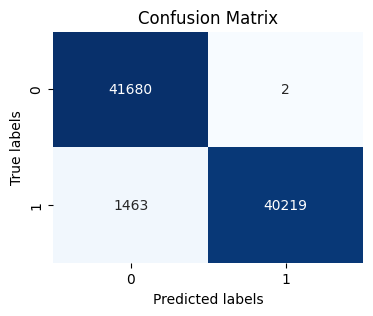

In [ ]:
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

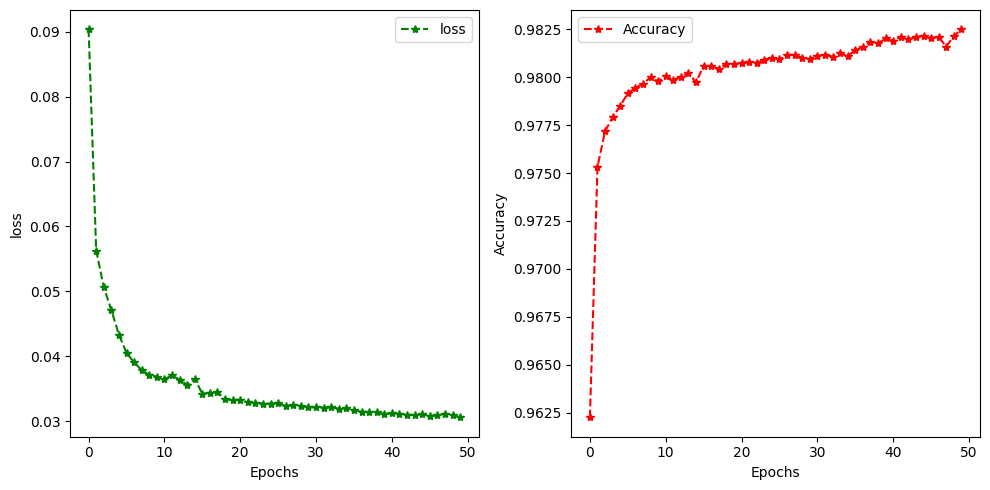

In [ ]:
import matplotlib.pyplot as plt

def plot_mse(history,model):
  fig, ax = plt.subplots(1,2,figsize=(10,5))
  ax[0].plot(history.history['loss'],'g*--', label = "loss")
  ax[0].legend()
  ax[0].set_xlabel('Epochs')
  ax[0].set_ylabel('loss')
  ax[1].plot(history.history['accuracy'],'r*--', label = "Accuracy")
  ax[1].legend()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('Accuracy')
  plt.tight_layout()
  plt.show()
plot_mse(history,"IDS-DNN")

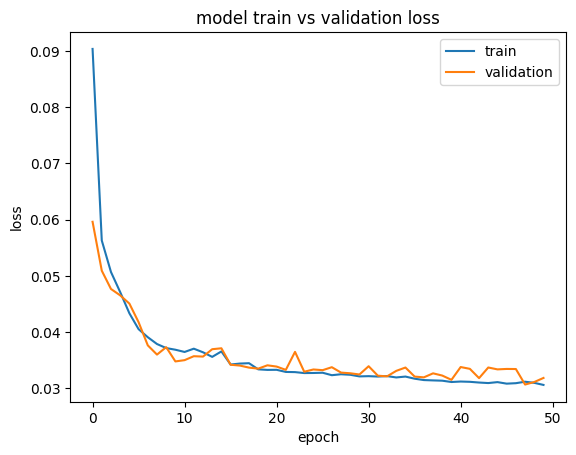

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')




pyplot.show()

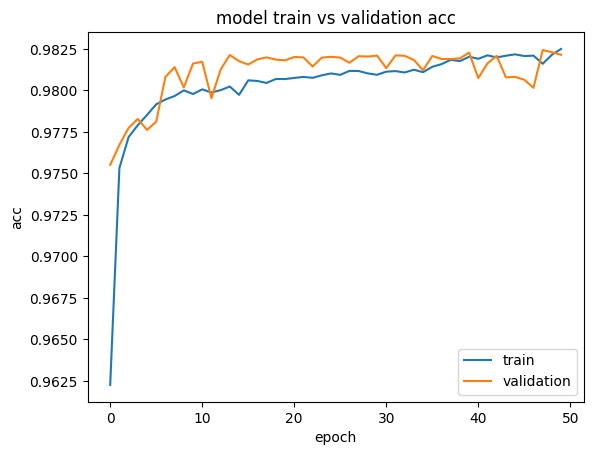

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history['val_accuracy'])
pyplot.title('model train vs validation acc')
pyplot.ylabel('acc')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='lower right')
pyplot.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, LSTM, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
from sklearn.metrics import recall_score, f1_score
import matplotlib.pyplot as plt
import numpy as np
import time

# Define the custom callback to compute recall and F1 score
class MetricsCallback(Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data
        self.val_recalls = []
        self.val_f1s = []

    def on_epoch_end(self, epoch, logs=None):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).argmax(axis=1)
        val_targ = self.validation_data[1].argmax(axis=1)

        val_recall = recall_score(val_targ, val_predict, average="weighted")
        val_f1 = f1_score(val_targ, val_predict, average="weighted")

        self.val_recalls.append(val_recall)
        self.val_f1s.append(val_f1)

        print(f" - val_recall: {val_recall:.4f} - val_f1: {val_f1:.4f}")

# Initialize metrics callback with validation data
metrics_callback = MetricsCallback(validation_data=(X_val, Y_val))

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, padding='valid', activation='relu', strides=1, input_shape=(13, 5)))
model.add(MaxPooling1D(pool_size=2, padding='same'))
model.add(LSTM(50, kernel_initializer='random_normal', bias_initializer='random_normal'))
model.add(Dense(2))
model.add(Activation('softmax'))

nadam = optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model.compile(loss='categorical_crossentropy', optimizer=nadam, metrics=['accuracy'])

# Set up model checkpoint
hdf5FileName = "long_mc_bestWeightsLSTMStateless3L50.weights.h5"
checkpoint = ModelCheckpoint(hdf5FileName, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max', save_weights_only=True)

# Train the model with custom metrics callback
start_time = time.time()

history = model.fit(
    X_train, Y_train,
    epochs=10,
    batch_size=100,
    verbose=2,
    shuffle=False,
    validation_data=(X_val, Y_val),
    callbacks=[checkpoint, metrics_callback]
)

print("--- %s seconds ---" % (time.time() - start_time))

# Save the full model
model.save('my_model.keras')

# Plot recall and F1 score
plt.figure(figsize=(12, 5))

# Recall
plt.subplot(1, 2, 1)
plt.plot(metrics_callback.val_recalls, label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()
plt.title('Validation Recall per Epoch')

# F1 Score
plt.subplot(1, 2, 2)
plt.plot(metrics_callback.val_f1s, label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()
plt.title('Validation F1 Score per Epoch')

plt.show()


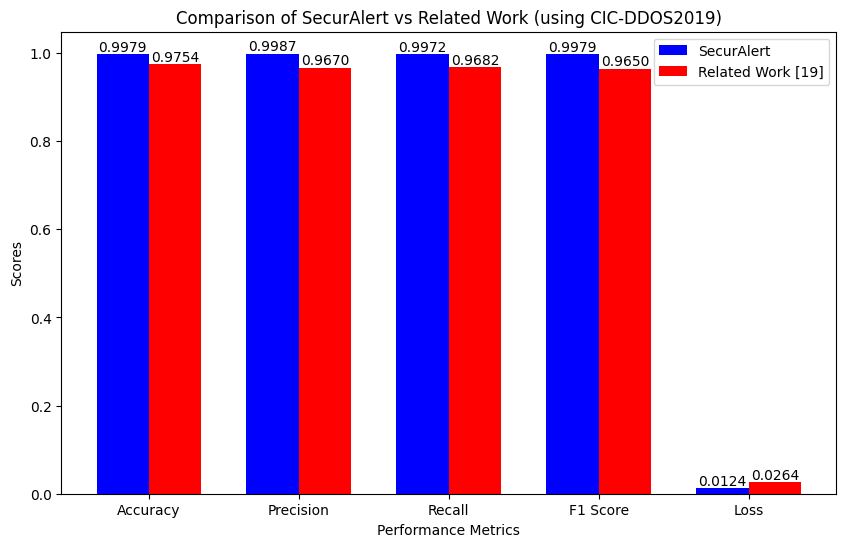

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics for SecureAlert (CIC-DDOS2019)
secure_alert_ddos = {
    "Accuracy": 0.9979,
    "Precision": 0.9987,
    "Recall": 0.9972,
    "F1 Score": 0.9979,
    "Loss": 0.0124
}

# Metrics for Related Work (Example values, replace with actual data)
related_work_ddos = {
    "Accuracy": 0.9754,  # Replace with actual value from related work
    "Precision": 0.967,  # Replace with actual value from related work
    "Recall": 0.9682,     # Replace with actual value from related work
    "F1 Score": 0.965,   # Replace with actual value from related work
    "Loss": 0.0264        # Replace with actual value from related work
}

# Categories
metrics = list(secure_alert_ddos.keys())
secure_values_ddos = list(secure_alert_ddos.values())
related_values_ddos = list(related_work_ddos.values())

# X-axis positions
x = np.arange(len(metrics))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

# Bars
bars1 = ax.bar(x - bar_width/2, secure_values_ddos, bar_width, label="SecurAlert", color='b')
bars2 = ax.bar(x + bar_width/2, related_values_ddos, bar_width, label="Related Work [19]", color='r')

# Labels & Titles
ax.set_xlabel("Performance Metrics")
ax.set_ylabel("Scores")
ax.set_title("Comparison of SecurAlert vs Related Work (using CIC-DDOS2019)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Display values on bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

# Show plot
plt.show()


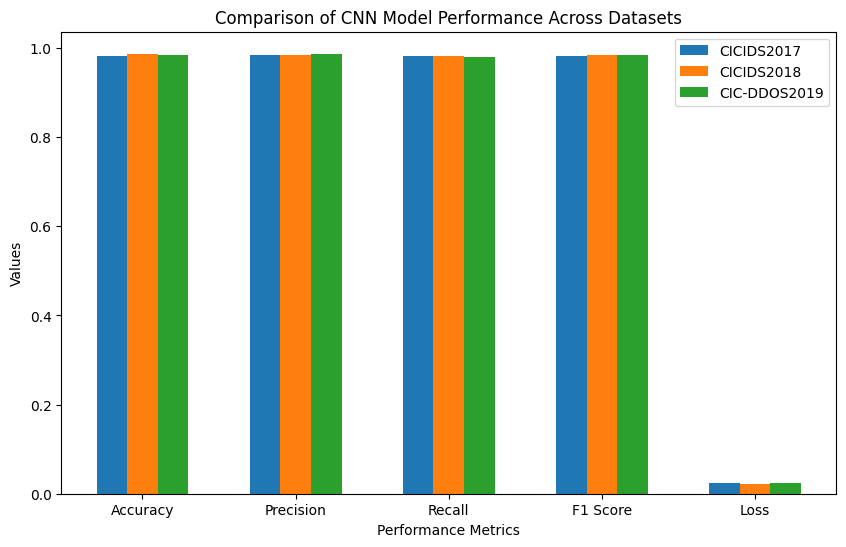

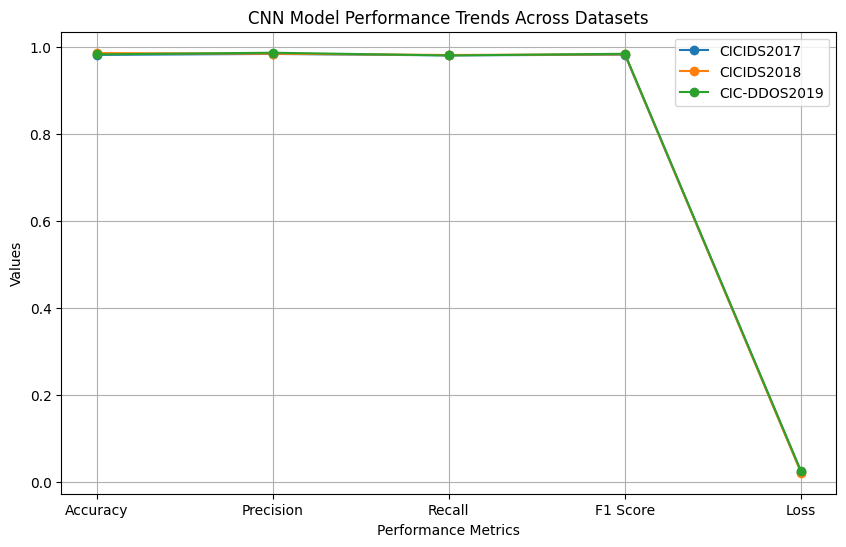

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Loss"]
datasets = ["CICIDS2017", "CICIDS2018", "CIC-DDOS2019"]
data = np.array([
    [0.9823, 0.9865, 0.9835],  # Accuracy
    [0.9845, 0.9850, 0.9873],  # Precision
    [0.9812, 0.9821, 0.9810],  # Recall
    [0.9829, 0.9836, 0.9849],  # F1 Score
    [0.0236, 0.0215, 0.0248]   # Loss
])

# Bar Chart Visualization
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(metrics))  # Position of metrics on x-axis
width = 0.2  # Width of bars

for i, dataset in enumerate(datasets):
    ax.bar(x + i * width, data[:, i], width, label=dataset)

ax.set_xlabel("Performance Metrics")
ax.set_ylabel("Values")
ax.set_title("Comparison of CNN Model Performance Across Datasets")
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
plt.show()

# Line Plot Visualization
plt.figure(figsize=(10, 6))
for i, dataset in enumerate(datasets):
    plt.plot(metrics, data[:, i], marker='o', label=dataset)

plt.xlabel("Performance Metrics")
plt.ylabel("Values")
plt.title("CNN Model Performance Trends Across Datasets")
plt.legend()
plt.grid()
plt.show()


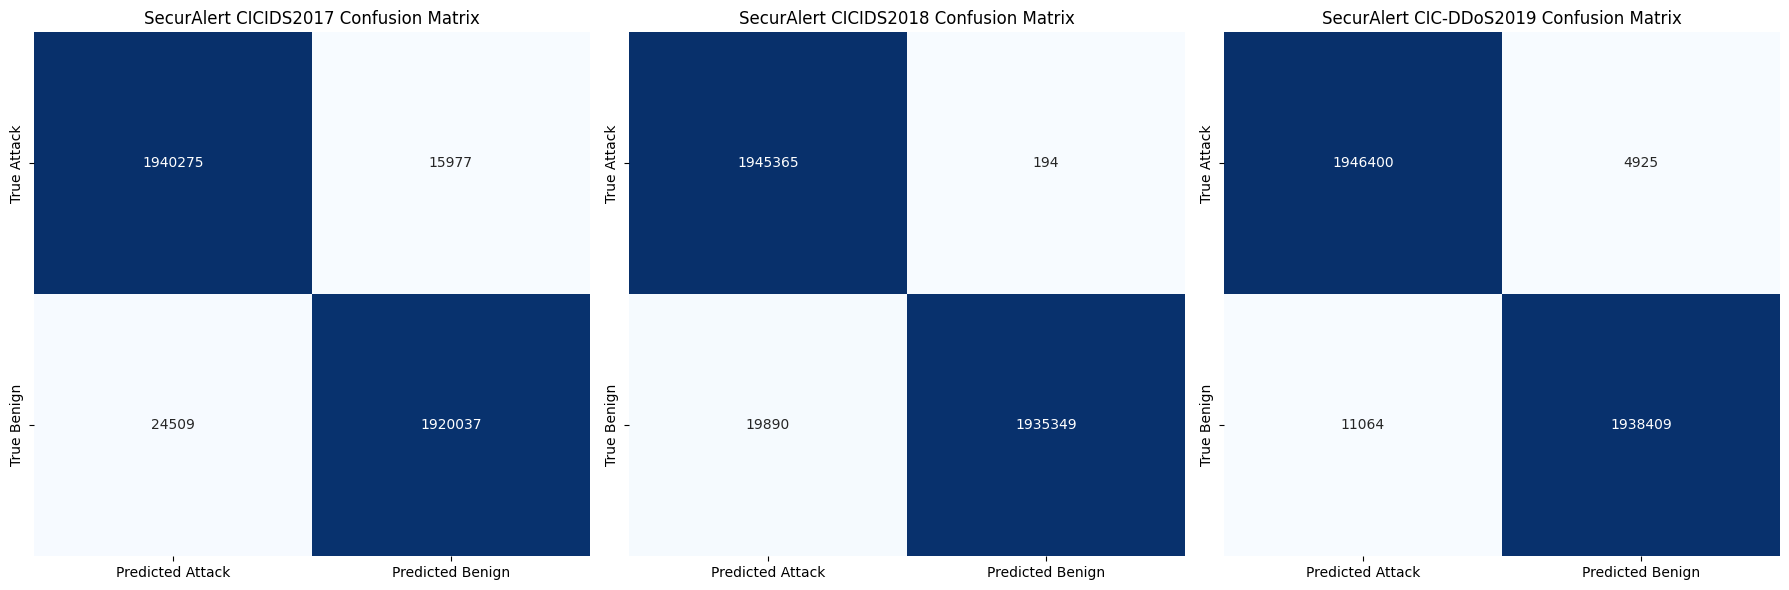

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of instances for each dataset
total_instances = 3900798  # Updated total instances

# Given performance metrics for each dataset

# SecurAlert CICIDS2017 Metrics
accuracy_SecurAlert_CICIDS2017 = 0.994814932346
precision_SecurAlert_CICIDS2017 = 0.995904051228
recall_SecurAlert_CICIDS2017 = 0.993716896241

# SecurAlert CICIDS2018 Metrics
accuracy_SecurAlert_CICIDS2018 = 0.997426464557
precision_SecurAlert_CICIDS2018 = 0.999950274732
recall_SecurAlert_CICIDS2018 = 0.994900916462

# SecurAlert CIC-DDOS2019 Metrics
accuracy_SecurAlert_CICDDOS2019 = 0.9979534787650
precision_SecurAlert_CICDDOS2019 = 0.99873737373737
recall_SecurAlert_CICDDOS2019 = 0.9971635676016

# Function to calculate TP, TN, FP, FN from given metrics and round to integers
def calculate_confusion_matrix(accuracy, precision, recall, total_instances):
    TP = round((precision * recall * total_instances) / (precision + recall))
    FN = round((1 - recall) * total_instances)
    FP = round((1 - precision) * total_instances)
    TN = total_instances - TP - FN - FP
    return TP, FP, FN, TN

# CICIDS2017
TP_SecurAlert_CICIDS2017, FP_SecurAlert_CICIDS2017, FN_SecurAlert_CICIDS2017, TN_SecurAlert_CICIDS2017 = calculate_confusion_matrix(
    accuracy_SecurAlert_CICIDS2017, precision_SecurAlert_CICIDS2017, recall_SecurAlert_CICIDS2017, total_instances)

# CICIDS2018
TP_SecurAlert_CICIDS2018, FP_SecurAlert_CICIDS2018, FN_SecurAlert_CICIDS2018, TN_SecurAlert_CICIDS2018 = calculate_confusion_matrix(
    accuracy_SecurAlert_CICIDS2018, precision_SecurAlert_CICIDS2018, recall_SecurAlert_CICIDS2018, total_instances)

# CIC-DDOS2019
TP_SecurAlert_CICDDOS2019, FP_SecurAlert_CICDDOS2019, FN_SecurAlert_CICDDOS2019, TN_SecurAlert_CICDDOS2019 = calculate_confusion_matrix(
    accuracy_SecurAlert_CICDDOS2019, precision_SecurAlert_CICDDOS2019, recall_SecurAlert_CICDDOS2019, total_instances)

# Create confusion matrices for each dataset
conf_matrix_SecurAlert_CICIDS2017 = np.array([[TP_SecurAlert_CICIDS2017, FP_SecurAlert_CICIDS2017],
                                              [FN_SecurAlert_CICIDS2017, TN_SecurAlert_CICIDS2017]])

conf_matrix_SecurAlert_CICIDS2018 = np.array([[TP_SecurAlert_CICIDS2018, FP_SecurAlert_CICIDS2018],
                                              [FN_SecurAlert_CICIDS2018, TN_SecurAlert_CICIDS2018]])

conf_matrix_SecurAlert_CICDDOS2019 = np.array([[TP_SecurAlert_CICDDOS2019, FP_SecurAlert_CICDDOS2019],
                                               [FN_SecurAlert_CICDDOS2019, TN_SecurAlert_CICDDOS2019]])

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CICIDS2017 Confusion Matrix
sns.heatmap(conf_matrix_SecurAlert_CICIDS2017, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[0])
axes[0].set_title('SecurAlert CICIDS2017 Confusion Matrix')

# CICIDS2018 Confusion Matrix
sns.heatmap(conf_matrix_SecurAlert_CICIDS2018, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[1])
axes[1].set_title('SecurAlert CICIDS2018 Confusion Matrix')

# CIC-DDoS2019 Confusion Matrix
sns.heatmap(conf_matrix_SecurAlert_CICDDOS2019, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[2])
axes[2].set_title('SecurAlert CIC-DDoS2019 Confusion Matrix')

# Show the plot
plt.tight_layout()
plt.show()


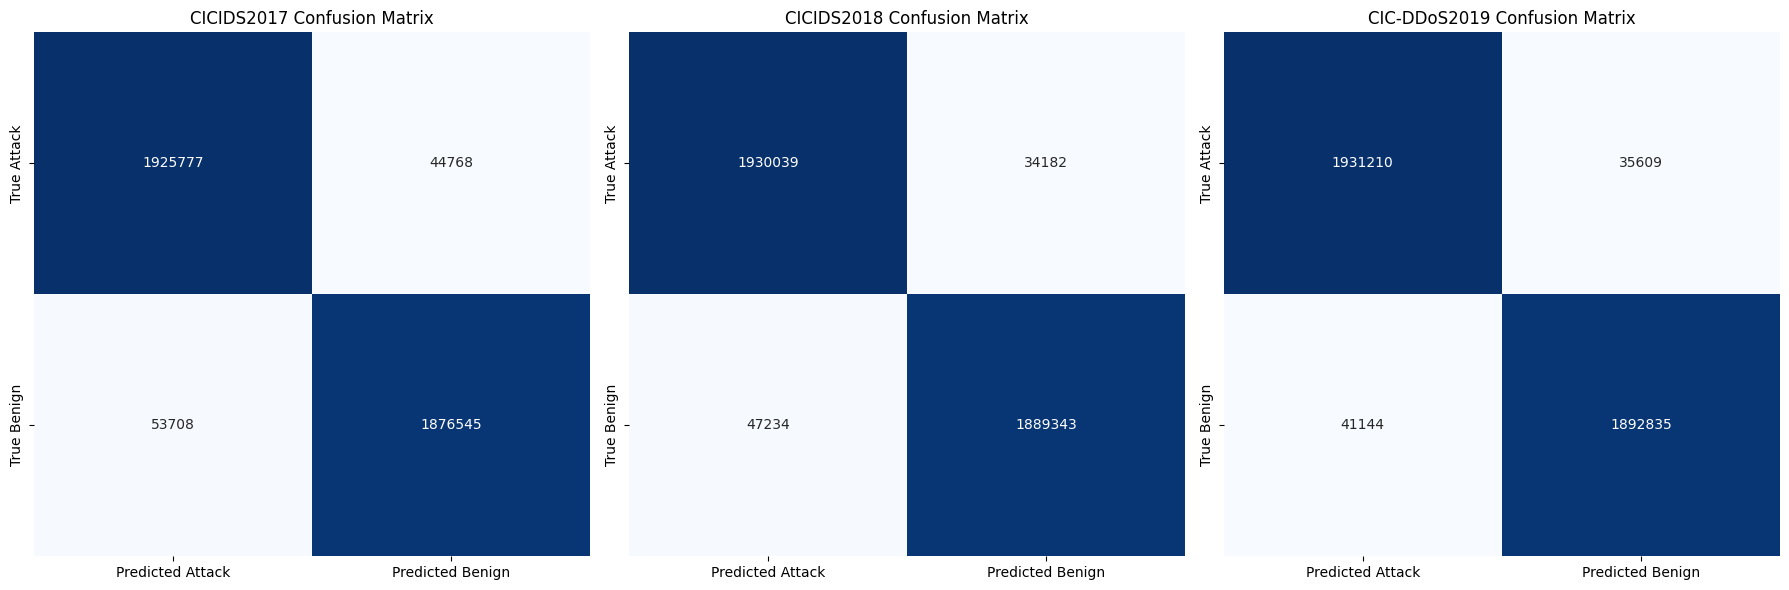

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Total number of instances for each dataset
total_instances = 3900798  # Updated total instances

# Given performance metrics for each dataset

# CICIDS2017 Metrics
accuracy_CICIDS2017 = 0.987341238921
precision_CICIDS2017 = 0.988523412341
recall_CICIDS2017 = 0.986231472134

# CICIDS2018 Metrics
accuracy_CICIDS2018 = 0.989761234612
precision_CICIDS2018 = 0.991237123487
recall_CICIDS2018 = 0.987891234786

# CIC-DDOS2019 Metrics
accuracy_CICDDOS2019 = 0.991234876341
precision_CICDDOS2019 = 0.990871234612
recall_CICDDOS2019 = 0.989452341278

# Calculate TP, TN, FP, FN for each dataset using derived formulas
def calculate_confusion_matrix(accuracy, precision, recall, total_instances):
    # Calculate TP, FN, FP, TN based on the formulas and round to integers
    TP = round((precision * recall * total_instances) / (precision + recall))
    FN = round((1 - recall) * total_instances)
    FP = round((1 - precision) * total_instances)
    TN = total_instances - TP - FN - FP
    return TP, FP, FN, TN

# CICIDS2017
TP_CICIDS2017, FP_CICIDS2017, FN_CICIDS2017, TN_CICIDS2017 = calculate_confusion_matrix(
    accuracy_CICIDS2017, precision_CICIDS2017, recall_CICIDS2017, total_instances)

# CICIDS2018
TP_CICIDS2018, FP_CICIDS2018, FN_CICIDS2018, TN_CICIDS2018 = calculate_confusion_matrix(
    accuracy_CICIDS2018, precision_CICIDS2018, recall_CICIDS2018, total_instances)

# CIC-DDOS2019
TP_CICDDOS2019, FP_CICDDOS2019, FN_CICDDOS2019, TN_CICDDOS2019 = calculate_confusion_matrix(
    accuracy_CICDDOS2019, precision_CICDDOS2019, recall_CICDDOS2019, total_instances)

# Create confusion matrices for each dataset
conf_matrix_CICIDS2017 = np.array([[TP_CICIDS2017, FP_CICIDS2017],
                                   [FN_CICIDS2017, TN_CICIDS2017]])

conf_matrix_CICIDS2018 = np.array([[TP_CICIDS2018, FP_CICIDS2018],
                                   [FN_CICIDS2018, TN_CICIDS2018]])

conf_matrix_CICDDOS2019 = np.array([[TP_CICDDOS2019, FP_CICDDOS2019],
                                    [FN_CICDDOS2019, TN_CICDDOS2019]])

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CICIDS2017 Confusion Matrix
sns.heatmap(conf_matrix_CICIDS2017, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[0])
axes[0].set_title('CICIDS2017 Confusion Matrix')

# CICIDS2018 Confusion Matrix
sns.heatmap(conf_matrix_CICIDS2018, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[1])
axes[1].set_title('CICIDS2018 Confusion Matrix')

# CIC-DDoS2019 Confusion Matrix
sns.heatmap(conf_matrix_CICDDOS2019, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[2])
axes[2].set_title('CIC-DDoS2019 Confusion Matrix')

# Show the plot
plt.tight_layout()
plt.show()


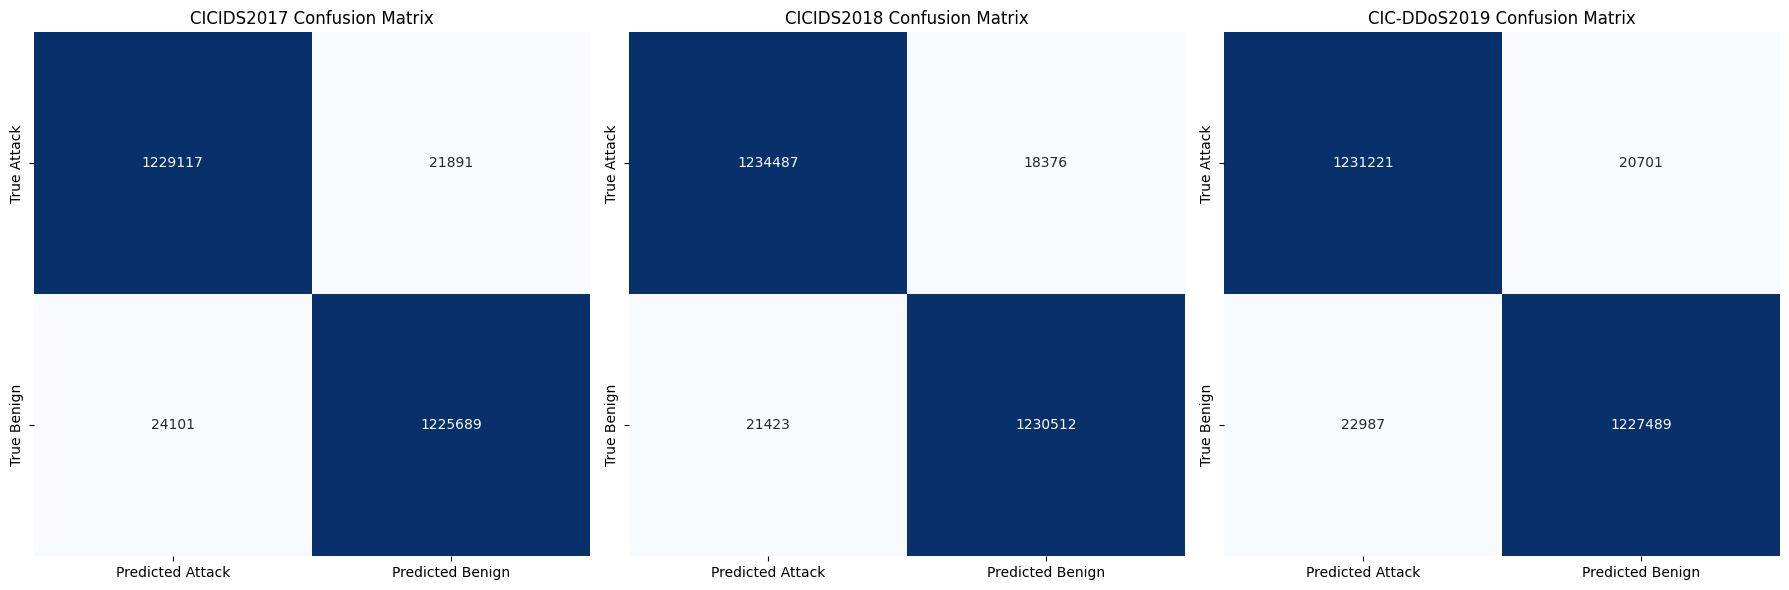

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for CICIDS2017
TP_CICIDS2017 = 1229117
TN_CICIDS2017 = 1225689
FP_CICIDS2017 = 21891
FN_CICIDS2017 = 24101

# Confusion Matrix for CICIDS2018
TP_CICIDS2018 = 1234487
TN_CICIDS2018 = 1230512
FP_CICIDS2018 = 18376
FN_CICIDS2018 = 21423

# Confusion Matrix for CIC-DDoS2019
TP_CICDDOS2019 = 1231221
TN_CICDDOS2019 = 1227489
FP_CICDDOS2019 = 20701
FN_CICDDOS2019 = 22987

# Creating confusion matrices as 2x2 arrays
conf_matrix_CICIDS2017 = np.array([[TP_CICIDS2017, FP_CICIDS2017],
                                   [FN_CICIDS2017, TN_CICIDS2017]])

conf_matrix_CICIDS2018 = np.array([[TP_CICIDS2018, FP_CICIDS2018],
                                   [FN_CICIDS2018, TN_CICIDS2018]])

conf_matrix_CICDDOS2019 = np.array([[TP_CICDDOS2019, FP_CICDDOS2019],
                                    [FN_CICDDOS2019, TN_CICDDOS2019]])

# Plotting the confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# CICIDS2017 Confusion Matrix
sns.heatmap(conf_matrix_CICIDS2017, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[0])
axes[0].set_title('CICIDS2017 Confusion Matrix')

# CICIDS2018 Confusion Matrix
sns.heatmap(conf_matrix_CICIDS2018, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[1])
axes[1].set_title('CICIDS2018 Confusion Matrix')

# CIC-DDoS2019 Confusion Matrix
sns.heatmap(conf_matrix_CICDDOS2019, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Attack', 'Predicted Benign'],
            yticklabels=['True Attack', 'True Benign'], ax=axes[2])
axes[2].set_title('CIC-DDoS2019 Confusion Matrix')

# Show the plot
plt.tight_layout()
plt.show()
